## Adult Dataset Part 1: Cleaning and Preparation

#### Objectives:
1. Preprocess the data and store the cleaned dataset as adult_clean.csv
2. Load clean dataset and test supervised/unsupervised models
    - Goal: Determine best model to predict if new entry earns >50k or <50k with supervised learning
    - Goal: Find insights and patterns in data using unspuervised learning
3. Apply k-folds cross validation
    - Goal: Evaluate robustness of results across different models.
    - Goal: Use and justify different error metrics


#### Summary of dataset

Datasource: https://archive.ics.uci.edu/ml/datasets/adult

Feature descrptions copied below from the UCI website:

- age: continuous. 
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
- fnlwgt: Continuous. A weighting assigned from the sampling process.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
- education-num: continuous. 
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
- sex: Female, Male. 
- capital-gain: continuous.
- capital-loss: continuous. 
- hours-per-week: continuous. 
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- target: >50K, <=50K.

In [97]:
import pandas as pd
from pandas_profiling import ProfileReport
import missingno
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [98]:
#original data does not come with headers. add headers based on the documentation descrption
headers = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 
           'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 
           'hours-per-week', 'native-country', 'target']

In [99]:
data = pd.read_csv('./data/adult.data', names = headers)
df = data.copy()

In [100]:
df.head()

age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  target  
0          2174             0              40   United-States   <=50K  
1             0             0              13   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40   United-States   <=50K  
4             0             0              40            Cuba   <=50K

In [101]:
df['capital-gain'].unique()

array([ 2174,     0, 14084,  5178,  5013,  2407, 14344, 15024,  7688,
       34095,  4064,  4386,  7298,  1409,  3674,  1055,  3464,  2050,
        2176,   594, 20051,  6849,  4101,  1111,  8614,  3411,  2597,
       25236,  4650,  9386,  2463,  3103, 10605,  2964,  3325,  2580,
        3471,  4865, 99999,  6514,  1471,  2329,  2105,  2885, 25124,
       10520,  2202,  2961, 27828,  6767,  2228,  1506, 13550,  2635,
        5556,  4787,  3781,  3137,  3818,  3942,   914,   401,  2829,
        2977,  4934,  2062,  2354,  5455, 15020,  1424,  3273, 22040,
        4416,  3908, 10566,   991,  4931,  1086,  7430,  6497,   114,
        7896,  2346,  3418,  3432,  2907,  1151,  2414,  2290, 15831,
       41310,  4508,  2538,  3456,  6418,  1848,  3887,  5721,  9562,
        1455,  2036,  1831, 11678,  2936,  2993,  7443,  6360,  1797,
        1173,  4687,  6723,  2009,  6097,  2653,  1639, 18481,  7978,
        2387,  5060], dtype=int64)

In [102]:
profile = ProfileReport(df)

In [103]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


On first look, it appears there are no missing values. **However the dataset descrption indicates that missing values have been flled with '?'.** Figure out what to do here :)

In [105]:
# Let's see in which columns and how many times the symbol `?` appear
df.apply(lambda x: (x.astype(str).str.strip() == '?').sum(), axis=0) / df.shape[0] * 100

age               0.000000
workclass         5.638647
fnlwgt            0.000000
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        5.660146
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    1.790486
target            0.000000
dtype: float64

There are 3 columns with missing values: `workclass`, `occupation` and `native-country`. Number of missing values in `workclass` is almost the same as in `occupation`; maybe these features have missing values for the same samples.

Before deciding **how to deal with the missing values want to know how they influence the data**. For example, if workclass and occupation for example both have missing values (in the same tuple) it would be reasonable to drop the data.

<AxesSubplot:>

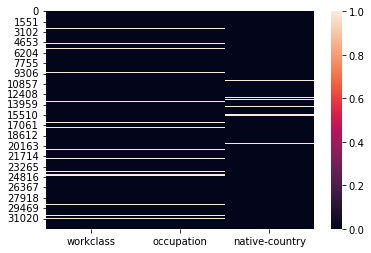

In [106]:
sns.heatmap(df[['workclass', 'occupation', 'native-country']].applymap(lambda x: x == ' ?'))

It looks like `workclass` and `occupation` have missing values for the same people.

In [107]:
print('Number of rows where both worklass and occupation have missing values: ', sum((df.workclass == ' ?') & (df.occupation == ' ?')))
print('Number of rows where both worklass and native-country missing values: ', sum((df.workclass == ' ?') & (df['native-country'] == ' ?')))
print('Number of rows where both occupation and native-country have missing values: ', sum((df.occupation == ' ?') & (df['native-country'] == ' ?')))

Number of rows where both worklass and occupation have missing values:  1836
Number of rows where both worklass and native-country missing values:  27
Number of rows where both occupation and native-country have missing values:  27


**What % of the dataset do nans represent?** What is the **best approach** for dealing with the nan's?

In [108]:
df[['workclass', 'occupation', 'native-country']].applymap(lambda x: x == ' ?').sum().sum() / df.shape[0] * 100

13.08927858481005

The total percentage of missing values represents about 13.1 %

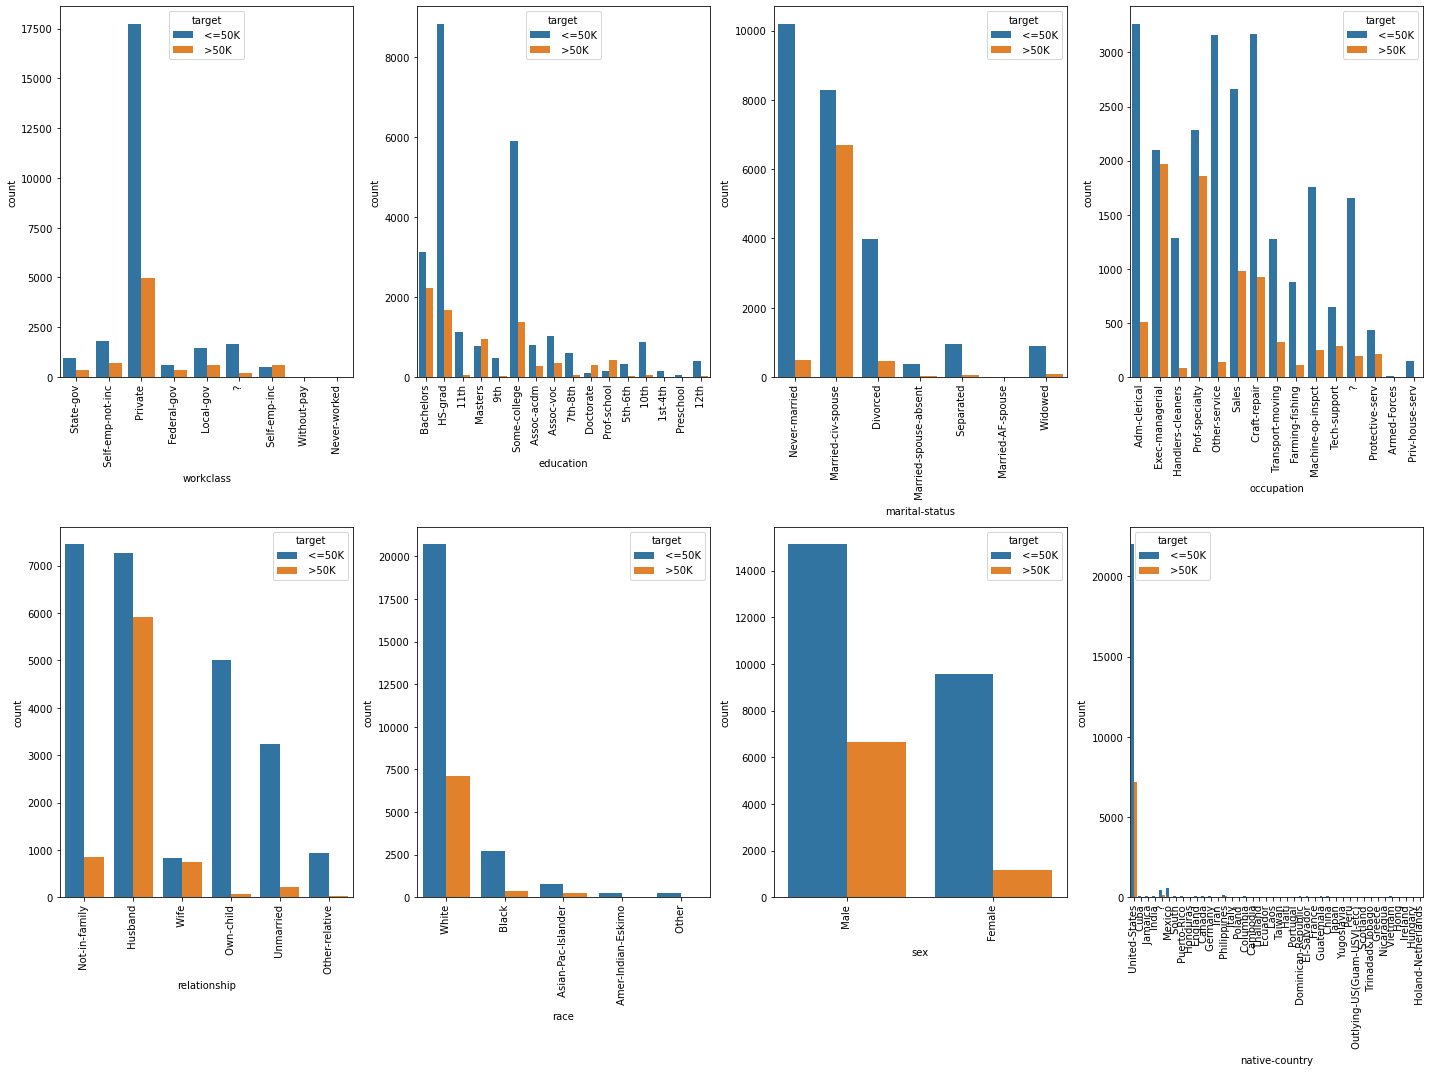

In [109]:
#plot the categroical columns to see what we are dealing with

plots_first_row = df.drop(columns='target').select_dtypes('object').columns[:4].to_list()
plots_second_row = df.drop(columns='target').select_dtypes('object').columns[4:].to_list()


fig, axs = plt.subplots(2, 4, figsize = (20, 15))

for col_name in plots_first_row + plots_second_row:
    if col_name in plots_first_row:
        labels = df[col_name].unique()
        idx = plots_first_row.index(col_name)
        sns.countplot(ax=axs[0, idx], x = df[col_name], hue = df.target)
        axs[0, idx].set_xticklabels(labels = labels, rotation = 90)
        
        
    else:
        labels = df[col_name].unique()
        idx = plots_second_row.index(col_name)
        sns.countplot(ax=axs[1, idx], x = df[col_name], hue = df.target)
        axs[1, idx].set_xticklabels(labels = labels, rotation = 90)

fig.tight_layout()

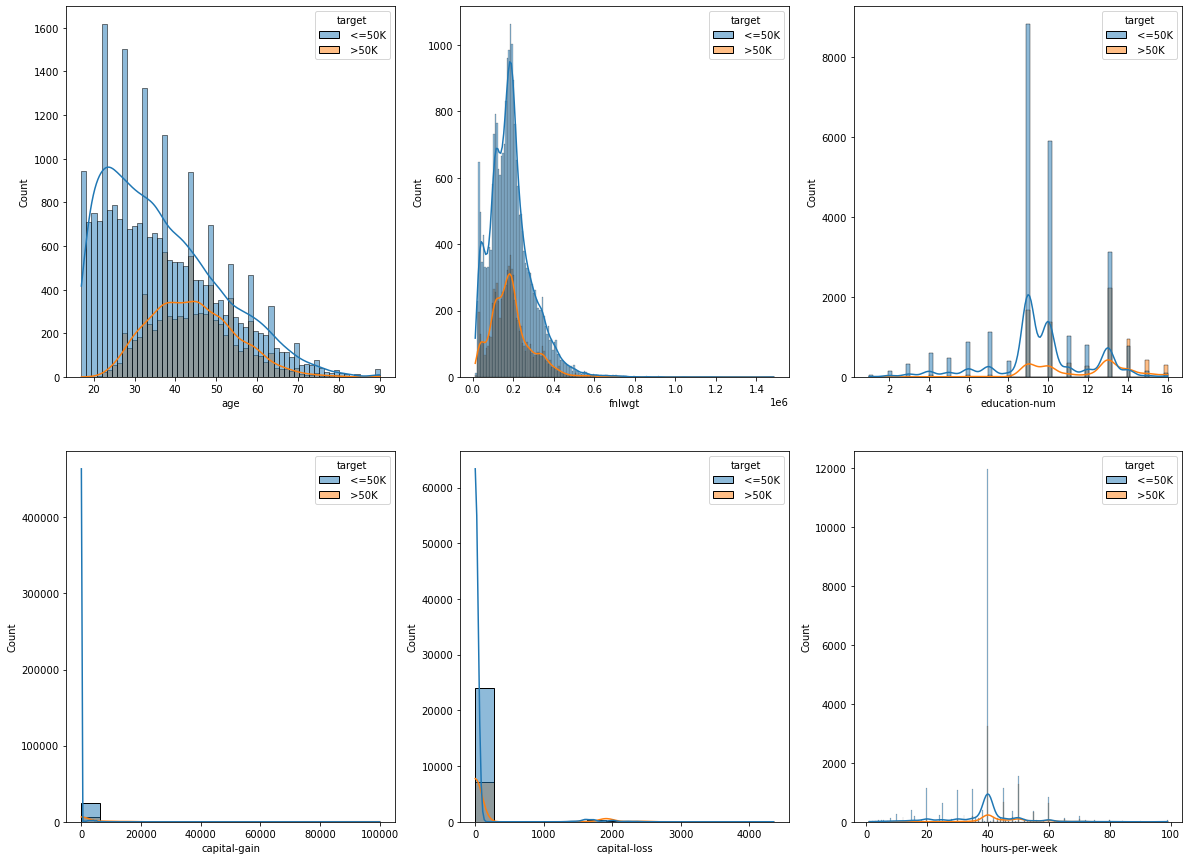

In [110]:
#plot the numerical columns

plots_first_row = df.drop(columns='target').select_dtypes('int').columns[:3].to_list()
plots_second_row = df.drop(columns='target').select_dtypes('int').columns[3:].to_list()



fig, axs = plt.subplots(2, 3, figsize = (20, 15))

for col_name in plots_first_row + plots_second_row:
    if col_name in plots_first_row:
        idx = plots_first_row.index(col_name)
        sns.histplot(ax=axs[0, idx], x = df[col_name], hue=df.target, kde=True)
        
        
    else:
        labels = df[col_name].unique()
        idx = plots_second_row.index(col_name)
        sns.histplot(ax=axs[1, idx], x = df[col_name], hue=df.target, kde=True)


# Target

 <=50K    0.75919
 >50K     0.24081
Name: target, dtype: float64

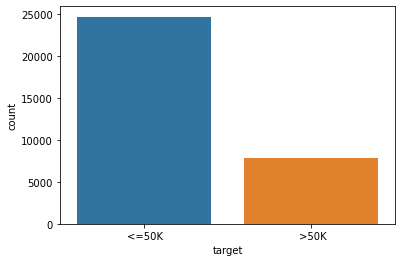

In [111]:
sns.countplot(x=df.target)
df.target.value_counts(normalize=True)

In [115]:
# Let's drop duplicates
df2 = df.replace(' ?', np.nan).dropna()
df.shape[0], df2.shape[0]

(32561, 30162)

In [116]:

# distribution of target after dropping na
df2.target.value_counts(normalize=True)

 <=50K    0.751078
 >50K     0.248922
Name: target, dtype: float64

#### Additional Steps:
1. Apply statistical tests to determine if dropping values changes the structure of the distribution in the workplace, occupation, and native-country categories i.e. t-test for differnce of modes. 
2. Compare filling the workplace and occupation columns with mode values and applying same statistical tests.

# Model

In [126]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import plot_confusion_matrix, classification_report

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector


In [121]:
df2['target']

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: target, Length: 30162, dtype: object

In [124]:
# Train, test split
X = df2.drop(columns='target')
y = df2['target']

X_train, X_test, y_train , y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(21113, 14) (21113,) (9049, 14) (9049,)


In [136]:
# Preprocessing set up
oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
preprocessor = ColumnTransformer([('oe', oe, make_column_selector(dtype_include=object))], 
                                    remainder='passthrough')


models = {'rf': RandomForestClassifier(), 
           'gbc': GradientBoostingClassifier()}

model_pipes = {name:Pipeline([('preprocessor', preprocessor), ('model', model) ]) for name, model in models.items()}

In [139]:
# Fitting and evaluation

for name, pipe in model_pipes.items():
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)
    # plot_confusion_matrix(pipe, X_test, y_test)
    print(name)
    print(classification_report(y_test, preds))
    print('-'*100)

rf
              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      6797
        >50K       0.74      0.63      0.68      2252

    accuracy                           0.85      9049
   macro avg       0.81      0.78      0.79      9049
weighted avg       0.85      0.85      0.85      9049

----------------------------------------------------------------------------------------------------
gbc
              precision    recall  f1-score   support

       <=50K       0.88      0.95      0.91      6797
        >50K       0.79      0.60      0.68      2252

    accuracy                           0.86      9049
   macro avg       0.83      0.77      0.79      9049
weighted avg       0.85      0.86      0.85      9049

----------------------------------------------------------------------------------------------------


# Discussion of results